In [1]:
%matplotlib inline

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [14]:
sns.set()

In [52]:
df = pd.read_csv('/Users/daviderickson/projects/datasf/data/Eviction_Notices.csv')
df['fileDate_datetime'] = pd.to_datetime(df['File Date'])
df['fileDate_year'] = df['fileDate_datetime'].dt.year

/Users/daviderickson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.shape

(40913, 42)

In [7]:
print(df.columns)

Index(['Eviction ID', 'Address', 'City', 'State',
       'Eviction Notice Source Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Constraints Date', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Location',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       ':@computed_region_fyvs_ahh9', ':@computed_region_p5aj_wyqh',
       ':@computed_region_rxqg_mtj9', ':@computed_region_yftq_j783',
       ':@computed_region_bh8s_q3mv', ':@computed_region_9jxd_iqea',
       ':@computed_region_6ezc_tdp2', ':@computed_region_6pnf_4xz7',
 

In [17]:
evictionReason_list = ['Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends']

In [8]:
df.head(3)

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Analysis Neighborhoods,:@computed_region_fyvs_ahh9,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_bh8s_q3mv,:@computed_region_9jxd_iqea,:@computed_region_6ezc_tdp2,:@computed_region_6pnf_4xz7,:@computed_region_h4ep_8xdi
0,M191455,900 Block Of Powell Street,San Francisco,CA,94108,06/28/2019,False,False,True,False,...,6.0,4.0,1.0,10.0,3.0,28857.0,NaN,NaN,2.0,NaN
1,M191505,900 Block Of Naples Street,San Francisco,CA,94112,06/28/2019,False,False,False,False,...,7.0,5.0,7.0,6.0,9.0,28861.0,NaN,NaN,2.0,NaN
2,M191507,1700 Block Of Vallejo Street,San Francisco,CA,94123,06/28/2019,False,False,False,False,...,13.0,17.0,9.0,1.0,13.0,28858.0,NaN,NaN,1.0,NaN


In [9]:
df.describe()

,Supervisor District,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_fyvs_ahh9,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_bh8s_q3mv,:@computed_region_9jxd_iqea,:@computed_region_6ezc_tdp2,:@computed_region_6pnf_4xz7,:@computed_region_h4ep_8xdi
count,39527.000000,39527.000000,39522.000000,39527.000000,39527.000000,39527.000000,39522.000000,39527.000000,39470.000000,39539.000000,3616.000000,3421.0,39527.000000,3424.0
mean,5.952134,53.194601,6.139391,6.065297,21.050927,20.685506,5.702798,6.267564,7.605827,18151.132401,7.044801,1.0,1.400638,1.0
std,2.966235,33.238389,2.776835,3.199930,11.564775,11.469657,2.590079,3.186253,4.886431,13995.476988,2.210546,0.0,0.490034,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,1.000000,1.0,1.000000,1.0
25%,3.000000,24.000000,4.000000,3.000000,11.000000,11.000000,4.000000,4.000000,2.000000,63.000000,6.000000,1.0,1.000000,1.0
50%,6.000000,50.000000,6.000000,6.000000,20.000000,19.000000,6.000000,6.000000,8.000000,28856.000000,6.000000,1.0,1.000000,1.0
75%,8.000000,84.000000,9.000000,9.000000,31.000000,31.000000,8.000000,9.000000,11.000000,28861.000000,8.000000,1.0,2.000000,1.0
max,11.000000,117.000000,10.000000,11.000000,41.000000,41.000000,10.000000,11.000000,15.000000,29492.000000,15.000000,1.0,2.000000,1.0


In [10]:
corr = df.corr()

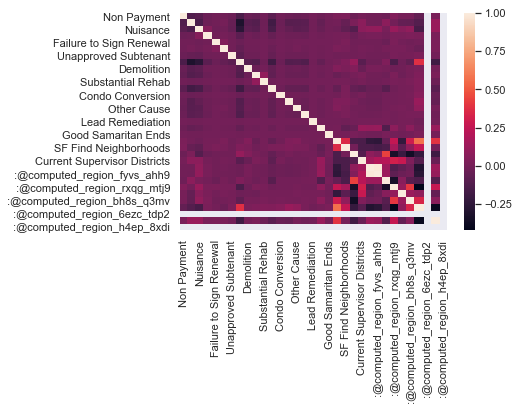

In [15]:
sns.heatmap(corr)

In [16]:
for col in df.columns: 
    series = df[col]
    print(len(series.unique()), col)

40913 Eviction ID
7270 Address
14 City
3 State
73 Eviction Notice Source Zipcode
5564 File Date
2 Non Payment
2 Breach
2 Nuisance
2 Illegal Use
2 Failure to Sign Renewal
2 Access Denial
2 Unapproved Subtenant
2 Owner Move In
2 Demolition
2 Capital Improvement
2 Substantial Rehab
2 Ellis Act WithDrawal
2 Condo Conversion
2 Roommate Same Unit
2 Other Cause
2 Late Payments
2 Lead Remediation
2 Development
2 Good Samaritan Ends
2556 Constraints Date
12 Supervisor District
42 Neighborhoods - Analysis Boundaries
9615 Location
115 SF Find Neighborhoods
11 Current Police Districts
12 Current Supervisor Districts
42 Analysis Neighborhoods
42 :@computed_region_fyvs_ahh9
11 :@computed_region_p5aj_wyqh
12 :@computed_region_rxqg_mtj9
16 :@computed_region_yftq_j783
29 :@computed_region_bh8s_q3mv
16 :@computed_region_9jxd_iqea
2 :@computed_region_6ezc_tdp2
3 :@computed_region_6pnf_4xz7
2 :@computed_region_h4ep_8xdi


In [19]:
for col in evictionReason_list: 
    series = df[col]
    print(np.sum(series), col)

2421 Non Payment
9236 Breach
6790 Nuisance
891 Illegal Use
95 Failure to Sign Renewal
312 Access Denial
748 Unapproved Subtenant
10195 Owner Move In
1162 Demolition
1605 Capital Improvement
82 Substantial Rehab
3925 Ellis Act WithDrawal
124 Condo Conversion
1352 Roommate Same Unit
1367 Other Cause
1643 Late Payments
8 Lead Remediation
363 Development
8 Good Samaritan Ends


In [64]:
df_neighborhood_year = df.pivot_table('Eviction ID', index='fileDate_year', columns='Neighborhoods - Analysis Boundaries', aggfunc='count')
df_neighborhood_year.fillna(value=0, inplace=True)

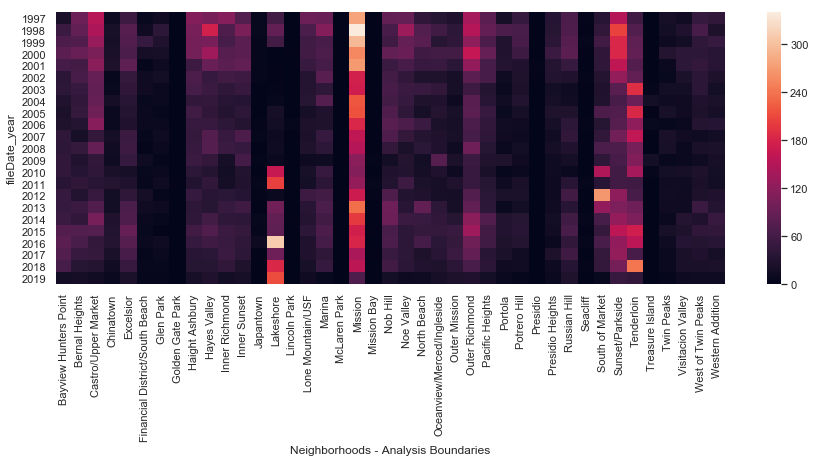

In [66]:
plt.figure(figsize=(15,5))
sns.heatmap(df_neighborhood_year)